In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from collections import defaultdict

In [2]:
label = {"standby_ASI": [(534, 424), 50, "c"],
         "standby_AH": [(528,530), 50, "c"],
         "standby_ALT": [(523, 626), 45, "c"], 
         "RPM_LEFT": [(633, 411), (672, 451), "r"],
         "G1000_ASI": [(674, 437), (710, 518), "r"],
         "G1000_AI": [(720, 413), (790, 495), "r"],
         "HSI": [(742, 556), 45, "c"],
         "G1000_ALT": [(797, 438), (852, 523), "r"],
         "NRST_Box": [(792, 534), (876, 554), "r"],
         "RPM_RIGHT": [(1054, 440), 30, "c"],
         "outside": [350, "l"]}

In [3]:
img = cv2.imread("flight.jpg")

overlay = img.copy()
thickness = -1

# overlay = cv2.circle(overlay, label["standby_ASI"][0], label["standby_ASI"][1], color, thickness)
# overlay = cv2.circle(overlay, label["standby_AH"][0], label["standby_AH"][1], color, thickness)
# overlay = cv2.circle(overlay, label["standby_ALT"][0], label["standby_ALT"][1], color, thickness)
# overlay = cv2.circle(overlay, label["HSI"][0], label["HSI"][1], color, thickness)
# overlay = cv2.circle(overlay, label["RPM_RIGHT"][0], label["RPM_RIGHT"][1], color, thickness)

# overlay = cv2.rectangle(overlay, label["RPM_LEFT"][0], label["RPM_LEFT"][1], color, thickness)
# overlay = cv2.rectangle(overlay, label["G1000_ASI"][0], label["G1000_ASI"][1], color, thickness)
# overlay = cv2.rectangle(overlay, label["G1000_AI"][0], label["G1000_AI"][1], color, thickness)
# overlay = cv2.rectangle(overlay, label["G1000_ALT"][0], label["G1000_ALT"][1], color, thickness)
# overlay = cv2.rectangle(overlay, label["NRST_Box"][0], label["NRST_Box"][1], color, thickness)

h,w,c = img.shape


In [4]:
pdict = defaultdict()

In [5]:
for key in label:
    if label[key][-1] == "c":
        mask = np.zeros((h,w), np.uint8)
        cv2.circle(mask,label[key][0], label[key][1],255,-1)
        points = np.where(mask==255)
        pdict[key] = points
    elif label[key][-1] == "r":
        mask = np.zeros((h,w), np.uint8)
        cv2.rectangle(mask,label[key][0], label[key][1],255,-1)
        points = np.where(mask==255)
        pdict[key] = points
    elif label[key][-1] == "l":
        mask = np.zeros((h,w), np.uint8)
        cv2.rectangle(mask, (0,0), (w,label[key][0]),255,-1)
        points = np.where(mask==255)
        pdict[key] = points

In [6]:
cdict = {}
for key in pdict:
    cdict[key] = np.mean(pdict[key], axis = 1)

In [ ]:
pdict["outside"]

In [7]:
color = (0,255,0)

for key in pdict:
    overlay[pdict[key]] = color

In [8]:
alpha = 0.6

# Following line overlays transparent rectangle over the image
image_new = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)

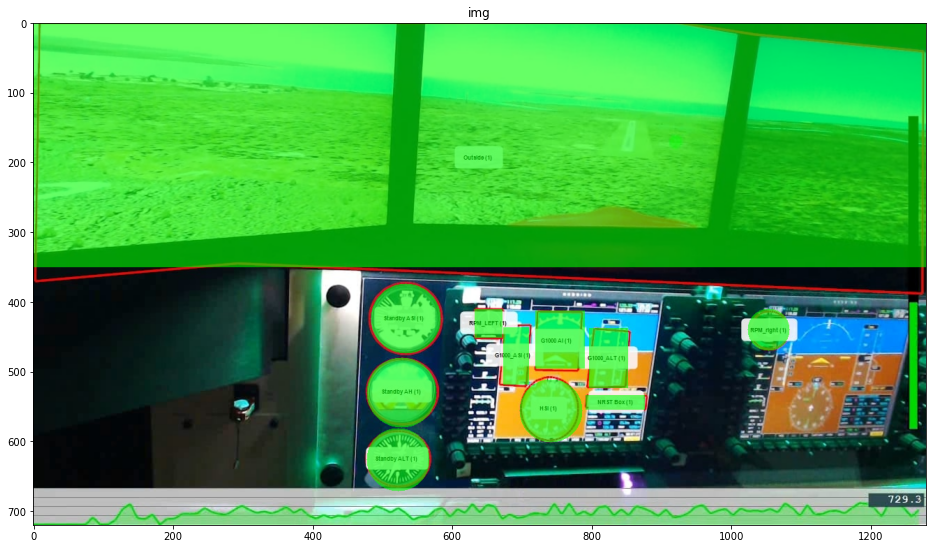

In [10]:
figure =plt.figure(figsize=(16,10))
plt.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))
plt.title('img')
plt.show()

In [11]:
csv_file = "data/PISSS_ID_003_Approach Two Gaze-Vergence.csv"

In [12]:
df_data = pd.read_csv(csv_file)

In [13]:
df_data = df_data.dropna()

In [14]:
x = df_data[["Y Pos", "X Pos"]].values

In [ ]:
x

In [15]:
x = np.array(x, dtype="int64")

In [16]:
def dist(x,y):
    return (x[0]-y[0])**2 + (x[1]-y[1])**2 

In [31]:
l = []

for i, v in enumerate(x):
    if i == 1000:
        break
    d = [dist(v, cdict[k]) for k in cdict]
    order = np.argsort(d)
    for o in order:
        key = "missing"
        points = np.transpose(list(pdict.values())[o])
#         if v in point:
        if any((points[:]==v).all(1)):
            key = list(pdict.keys())[o]
            break
            
    l.append(key)    
    print("{}:{} -> {}".format(i, v, key))


0:[446 677] -> G1000_ASI
1:[445 676] -> G1000_ASI
2:[445 676] -> G1000_ASI
3:[444 674] -> G1000_ASI
4:[444 673] -> missing
5:[443 672] -> RPM_LEFT
6:[442 670] -> RPM_LEFT
7:[442 669] -> RPM_LEFT
8:[441 669] -> RPM_LEFT
9:[441 668] -> RPM_LEFT
10:[440 668] -> RPM_LEFT
11:[439 668] -> RPM_LEFT
12:[439 668] -> RPM_LEFT
13:[439 669] -> RPM_LEFT
14:[440 668] -> RPM_LEFT
15:[440 668] -> RPM_LEFT
16:[441 668] -> RPM_LEFT
17:[441 668] -> RPM_LEFT
18:[440 669] -> RPM_LEFT
19:[441 669] -> RPM_LEFT
20:[440 669] -> RPM_LEFT
21:[440 670] -> RPM_LEFT
22:[438 672] -> RPM_LEFT
23:[438 673] -> missing
24:[438 673] -> missing
25:[438 673] -> missing
26:[437 674] -> G1000_ASI
27:[438 673] -> missing
28:[438 673] -> missing
29:[439 673] -> missing
30:[441 673] -> missing
31:[433 687] -> missing
32:[425 702] -> missing
33:[407 729] -> missing
34:[390 756] -> missing
35:[372 780] -> missing
36:[356 804] -> missing
37:[339 827] -> outside
38:[321 850] -> outside
39:[311 861] -> outside
40:[310 860] -> outsid

337:[268 898] -> outside
338:[268 897] -> outside
339:[268 897] -> outside
340:[267 896] -> outside
341:[267 895] -> outside
342:[267 894] -> outside
343:[266 894] -> outside
344:[267 893] -> outside
345:[267 893] -> outside
346:[268 894] -> outside
347:[268 894] -> outside
348:[269 895] -> outside
349:[268 896] -> outside
350:[268 897] -> outside
351:[266 897] -> outside
352:[265 897] -> outside
353:[262 897] -> outside
354:[261 896] -> outside
355:[260 894] -> outside
356:[261 893] -> outside
357:[262 892] -> outside
358:[264 890] -> outside
359:[267 890] -> outside
360:[270 890] -> outside
361:[272 889] -> outside
362:[274 890] -> outside
363:[275 890] -> outside
364:[276 890] -> outside
365:[276 890] -> outside
366:[276 890] -> outside
367:[275 890] -> outside
368:[273 891] -> outside
369:[271 892] -> outside
370:[268 891] -> outside
371:[266 892] -> outside
372:[264 891] -> outside
373:[262 891] -> outside
374:[262 889] -> outside
375:[263 887] -> outside
376:[266 888] -> outside


663:[435 687] -> missing
664:[435 686] -> missing
665:[435 684] -> missing
666:[435 683] -> missing
667:[435 682] -> missing
668:[434 681] -> missing
669:[434 680] -> missing
670:[434 680] -> missing
671:[434 680] -> missing
672:[434 679] -> missing
673:[434 679] -> missing
674:[434 678] -> missing
675:[435 678] -> missing
676:[435 677] -> missing
677:[436 677] -> missing
678:[437 676] -> G1000_ASI
679:[437 676] -> G1000_ASI
680:[437 675] -> G1000_ASI
681:[436 675] -> missing
682:[436 674] -> missing
683:[435 674] -> missing
684:[435 674] -> missing
685:[435 674] -> missing
686:[435 673] -> missing
687:[435 673] -> missing
688:[436 672] -> RPM_LEFT
689:[437 672] -> RPM_LEFT
690:[438 671] -> RPM_LEFT
691:[439 671] -> RPM_LEFT
692:[439 671] -> RPM_LEFT
693:[439 671] -> RPM_LEFT
694:[439 671] -> RPM_LEFT
695:[438 672] -> RPM_LEFT
696:[437 672] -> RPM_LEFT
697:[436 672] -> RPM_LEFT
698:[435 672] -> RPM_LEFT
699:[434 671] -> RPM_LEFT
700:[434 671] -> RPM_LEFT
701:[433 670] -> RPM_LEFT
702:[

In [30]:
any((np.transpose(pdict["standby_ALT"])[:]==[365,827]).all(1))

False

In [ ]:
x[0]

In [32]:
vout = cv2.VideoWriter("sample.avi", cv2.VideoWriter_fourcc(*"MJPG"), 30,(w,h))

In [33]:
img = cv2.imread("flight.jpg")
points = []
len_points = 20

for i in range(len(l)):
    print(i)
    overlay = img.copy()
    
    color_no = (0,255,0)
    color_yes = (0,0,255)
    
    points.append(x[i])

    if len(points) >= len_points:
        points = points[1:]
    
    for p in points:
        overlay = cv2.circle(overlay, (p[1], p[0]), radius=3, color=(0, 0, 255), thickness=-1)
    
    for key in pdict:
        if key == l[i]:
            overlay[pdict[key]] = color_yes
        else:
            overlay[pdict[key]] = color_no

    frame = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)   
    
    vout.write(frame)
vout.release()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27